### Линейные методы в машинном обучении

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b $$,
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x> $$,
где $<\cdot, \cdot>$ -- скалярное произведение векторов.

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw $$,
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

#### Задание 1

Реализуйте линейную регрессию, которая вычисляет веса признаков по формуле указанной выше

np.linalg.inv() - функция. которая возвращает обратную матрицу

In [ ]:
class MyLinearRegression:
    def __init__(self):
        self.w = None
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones([len(X) , 1])
        X = np.concatenate( [X , a], 1) 
        # В эту переменную нужно сохранить результат:
        #np.dot(  A , B ) == A@B
        self.w = #you code here

        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1!
        a = np.ones([len(X) , 1])
        
        
        y_pred =  # Результат предсказания
        return y_pred
    
    def get_weights(self):
        return self.w  #тут тоже что-то нужно исправить 

Протестируем нашу модель на искуственных данных

In [ ]:
X = np.linspace(10, 20, 100)
y = -3 * X + 100

X_train = X[:50].reshape(-1, 1)
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[50:].reshape(-1, 1)
y_test = y[50:] + np.random.randn(50) * 10

In [ ]:
print(X_train.shape)
print(y_train.shape)

(50, 1)
(50,)


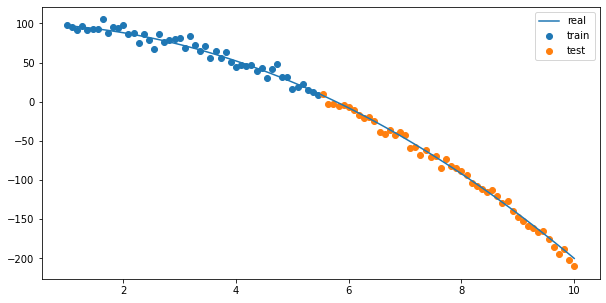

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

#### Задание 2

Обучите вашу модель на тренировочной выборке и предскажите значения на тесте.
Предсказанные ответы сохраните в переменную $\textbf{predictions}$, а веса модели сохраните в переменную $\textbf{w}$

In [ ]:
regressor = MyLinearRegression()



Визуализируем предсказания

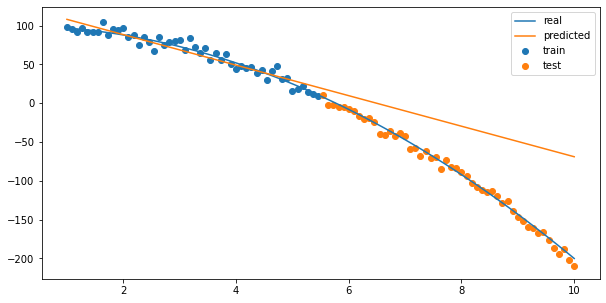

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), label='predicted')
plt.legend()
plt.show()

#### Задание 3

Вычислите среднеквадратичную ошибку на трейне и на тесте.
Какие результаты вы ожидаете получить? Какие получились? Почему?

In [ ]:
from sklearn.metrics import mean_squared_error

# ВАШ КОД ЗДЕСЬ



NameError: ignored

In [ ]:
X = np.linspace(-20, 20, 100)
y = +0.06*X**3 -1 * X**2  + 100

X_train = X[:50].reshape(-1, 1)
y_train = y[:50] + np.random.randn(50) * 10

X_test = X[50:].reshape(-1, 1)
y_test = y[50:] + np.random.randn(50) * 10

plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [ ]:
regressor = MyLinearRegression()
regressor.fit(X_train , y_train)
w = regressor.get_weights()

print(w)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X.reshape(-1, 1)), label='predicted')
plt.legend()
plt.show()

In [ ]:
w

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X[0], y, label='real')
plt.scatter(X_train[0], y_train, label='train')
plt.scatter(X_test[0], y_test, label='test')
plt.plot(X[0], regressor.predict(X.T), label='predicted')
plt.legend()
plt.show()

### Ridge&Lasso

На практике точные формулы для подсчета коэффициентов линейной регрессии не используются, а используется метод градиентного спуска который состоит в подсчете производных от ошибки и шагу в направлении наискорейшего убывания функции (напомню, что мы стремимся минимизировать функцию потерь). Эти методы работают быстрее, чем точное вычисление обратных матриц и их перемножение.
Более того, во многих задачах это единственный способ обучить модель, так как не всегда (на самом деле почти никогда) удается выписать точную формулу для минимума сложного функционала ошибки.

Давайте рассмотрим реализации линейных регрессоров в библиотеке sklearn

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
import sklearn
sklearn.__version__

# conda install sklearn=0.20.3

'0.22.2.post1'

Будем работать с датасетом wine

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine_data = load_wine()

In [ ]:
X = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
y = wine_data['target']

In [ ]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y[:10000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

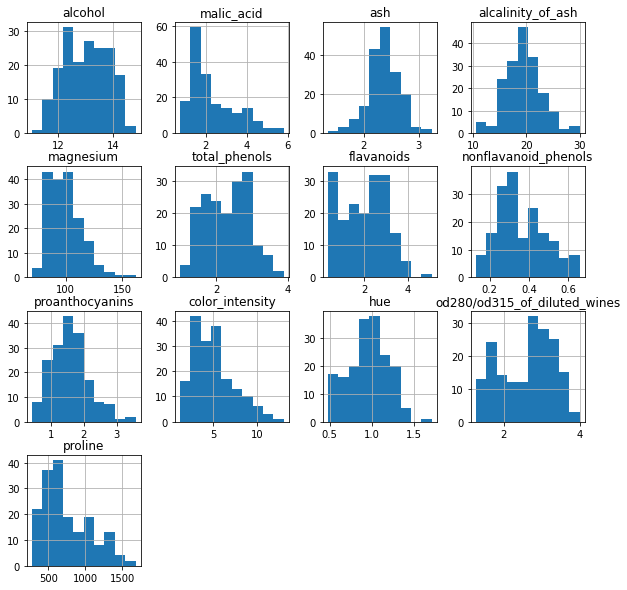

In [ ]:
# посторойте гистограммы распределения каждого из признаков ( используйте метод hist()  дополнительно укажите парреметр figsize=(10, 10) )
...

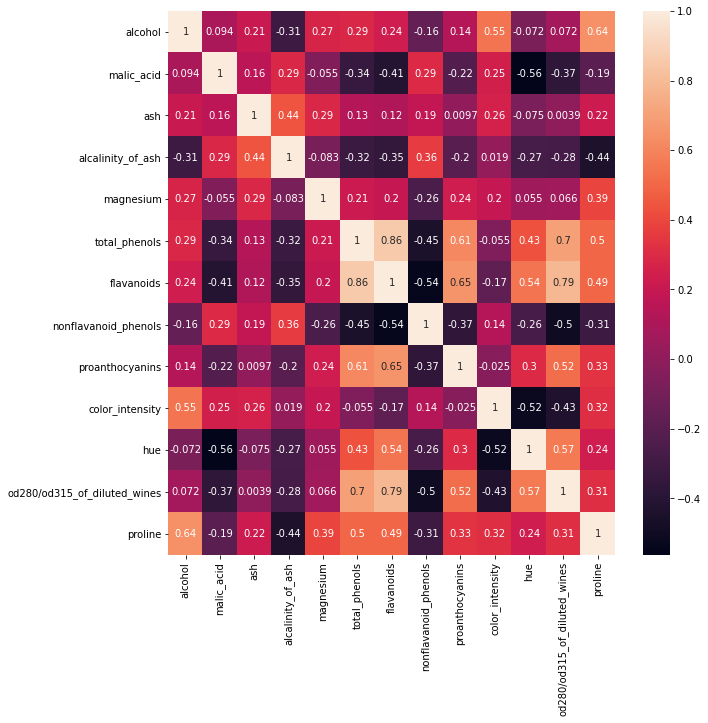

In [ ]:
import seaborn as sns

# постройте матрицу корреляции признаков 
_ = plt.subplots(figsize=(10, 10))  # эта строчка нужна для коректного отображения расмеров попробуйте ее убрать и увидите что с ней было лучше


In [ ]:
 #  выведете подматрицу корреляции для признаков ['alcohol', 'ash', 'hue']   (вам поможет метод loc) 
...

,alcohol,ash,hue
alcohol,1.000000,0.211545,-0.071747
ash,0.211545,1.000000,-0.074667
hue,-0.071747,-0.074667,1.000000


#### Задание 4

Разбейте выборку на train и test в соотношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

# ВАШ КОД ЗДЕСЬ:


X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0


Выполним нормировку данных

In [ ]:
X_train.std()

alcohol                           0.798773
malic_acid                        1.101859
ash                               0.283413
alcalinity_of_ash                 3.380364
magnesium                        13.439650
total_phenols                     0.622537
flavanoids                        1.017245
nonflavanoid_phenols              0.122522
proanthocyanins                   0.567437
color_intensity                   2.389091
hue                               0.230850
od280/od315_of_diluted_wines      0.723307
proline                         309.630874
dtype: float64

In [ ]:
X_train.mean()

alcohol                          12.978065
malic_acid                        2.427177
ash                               2.381452
alcalinity_of_ash                19.692742
magnesium                       100.161290
total_phenols                     2.283790
flavanoids                        1.997097
nonflavanoid_phenols              0.356935
proanthocyanins                   1.572903
color_intensity                   5.042339
hue                               0.945855
od280/od315_of_diluted_wines      2.620645
proline                         729.879032
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Подобрать "веса" объекта scaler
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.std()

1.0

In [ ]:
X_train.mean()

3.063444177129464e-16

#### Задание 5

Обучите линейную регрессию и подсчитайте качество на тесте

In [ ]:
regressor = LinearRegression()

# ВАШ КОД ЗДЕСЬ
...

print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, regressor.predict(X_train))))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

print('test mse: ', mean_squared_error(y_test, predictions))

Train RMSE:  0.24382184091409848
Test RMSE:  0.2632423688798449
test mse:  0.06929654477347234


Визуализируем получившиеся веса

<BarContainer object of 13 artists>

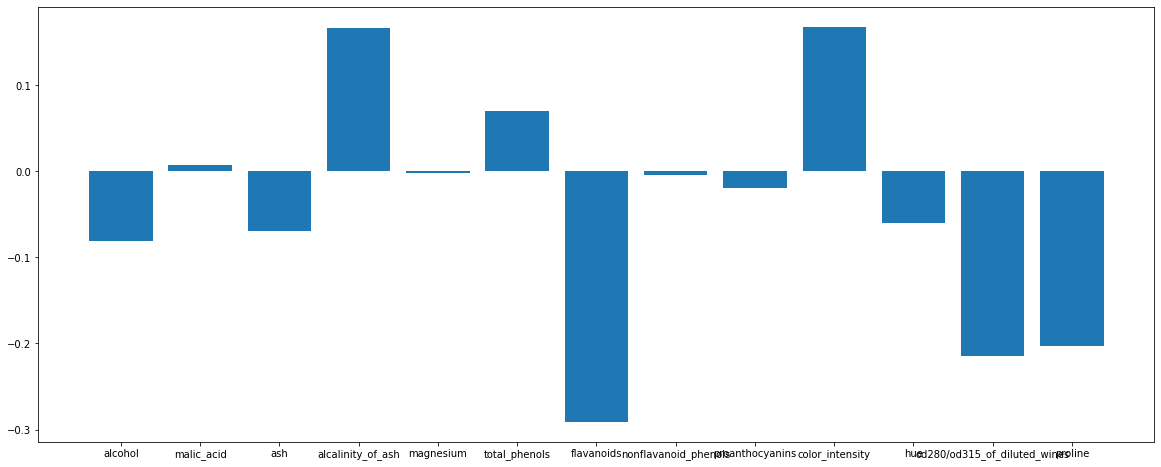

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, regressor.coef_)

Теперь обратимся к методам с регуляризацией.

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

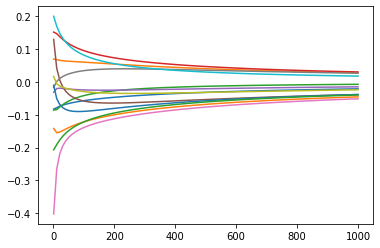

In [ ]:
alphas = np.linspace(1, 1000, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

['alcalinity_of_ash', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['flavanoids', 'proline']
['flavanoids']
['flavanoids']
['flavanoids']
[]
[]
[]
[]


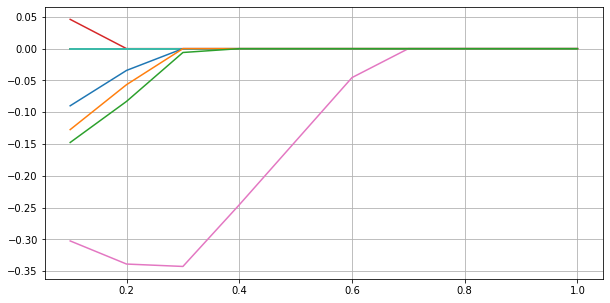

In [ ]:
alphas = np.linspace(0.1, 1, 10)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
    print([name for (name, coef) in zip(X.columns, lasso_regressor.coef_) if np.abs(coef) > 1e-4])
plt.plot(alphas, weights.T)
plt.grid()
plt.show()

#### Задание 6

Обучите модели Ridge и Lasso и подсчитайте ошибку на тесте. Постарайтесь подобрать лучшие параметры регуляризации

In [ ]:

# можно менять этот параметр:
l2_coef = 1000
ridge = Ridge(l2_coef)
ridge.fit(X_train, y_train)
print('mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

# и этот:
l1_coef = 0.3
lasso = Lasso(l1_coef)
lasso.fit(X_train, y_train)
print('mse lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))

mse ridge:  0.293456910628962
mse lasso:  0.23297664214867914


<BarContainer object of 13 artists>

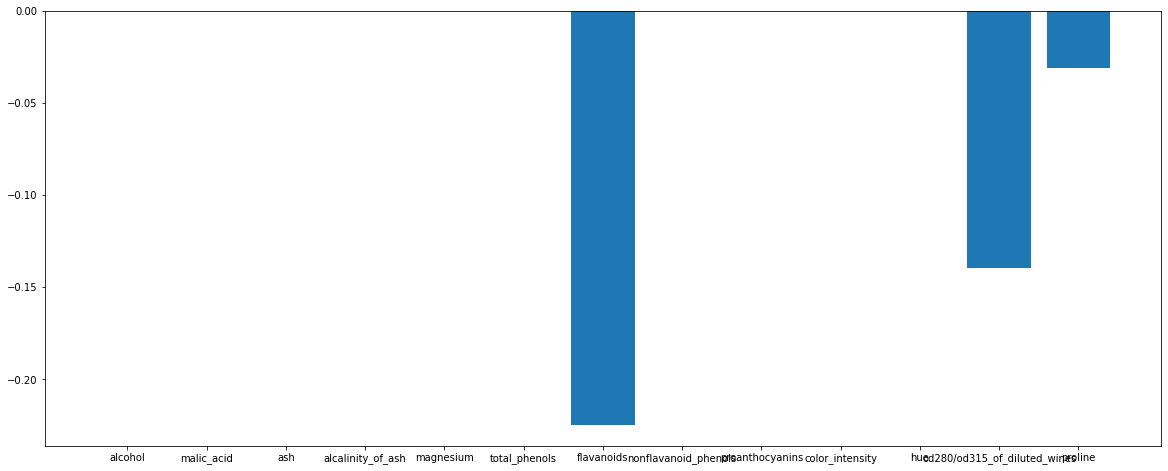

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, lasso.coef_)

<BarContainer object of 13 artists>

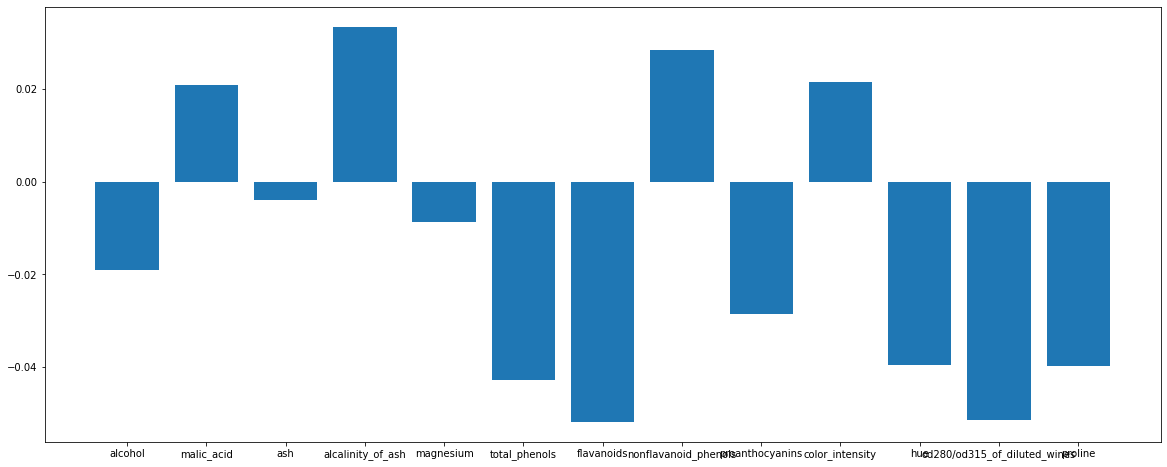

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, ridge.coef_)

#### Линейные методы классификации

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


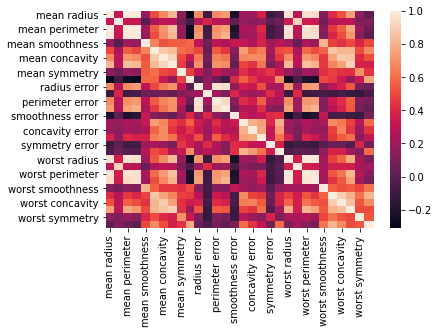

In [ ]:
import seaborn as sns
sns.heatmap(X.corr())

Первый метод -- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

#### Задание 7

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf = LogisticRegression()
...

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions.shape

(114, 2)

Подсчитаем accuracy и roc-auc наших предсказаний

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.7)

0.9736842105263158

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

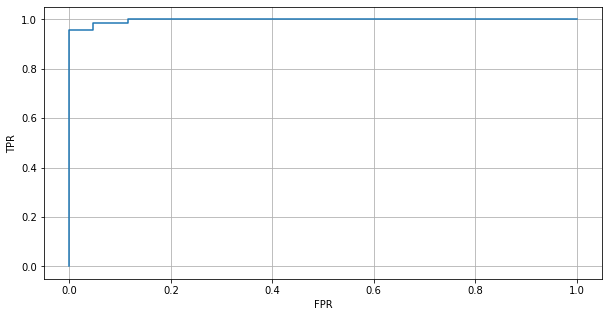

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

0.9970520799213888

#### Задание 8

Обучите линейный SVM и подсчитайте точность его предсказаний на тесте. Подсчитайте и ROC-AUC. Что можно сказать про эти результаты?

Замечание: чтобы создать классический линейный SVM нужно в качестве параметра в конструктор передать kernel="linear"

In [ ]:
from sklearn.svm import SVC 

In [ ]:
clf = ...

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = ...

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.7)

0.956140350877193

In [ ]:
...

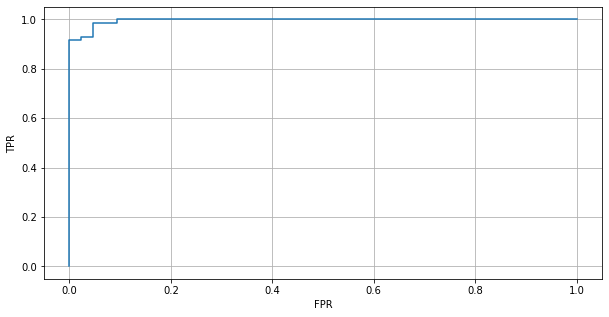

In [ ]:
auc

0.9957418932197839

SVM очень мощный алгоритм и долгое время он использовался почти во всех областях как основной инструмент для построения систем искуственного интеллекта (прямо как нейросети сейчас).

Однако его мощь приносит и немало слабостей. В частности он оказывается довольно чувствительным к шуму в данных и наличию несбалинсированности в классах.

Один из способов побороть вторую проблему -- давать бОльшие веса тем объектам, которых в выборке встречается меньше, тогда при обучении оба класса будут иметь одинаковый вклад в функцию потерь и модель будет обучаться лучше.

#### Задание 9

Разберитесь какой аргумент нужно передать в конструктор, чтобы модель боролась с несбалансированностью классов и обучите ее. Получилось ли улучшить качество?

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = clf.predict_proba(X_test)

In [ ]:
predictions = clf.predict_proba(X_test)
accuracy_score(y_test, predictions[:, 1] > 0.7)

0.9473684210526315

In [ ]:
predictions = clf.predict_proba(X_test)
print(accuracy_score(y_test, predictions[:, 1] > 0.7))
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

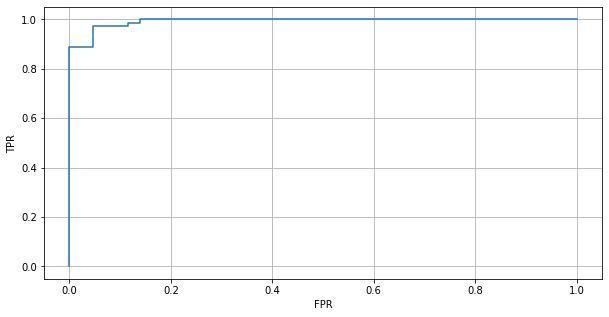

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

0.9924664264657713

#### Задание 10

Побороть шум и улучшить сходимость модели помогает нормировка признаков. Выполните ее и обучите предыдущую модель.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Подобрать "веса" объекта scaler


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predictions = clf.predict_proba(X_test)
print(accuracy_score(y_test, predictions[:, 1] > 0.7))
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

0.9649122807017544


In [ ]:
auc

0.9967245332459875

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
pipe.score(X_test, y_test)

0.9824561403508771

#### Задание 11*

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Задача - предсказать успешность кампании для каждого клиента (воспользуется услугой или нет) 

In [ ]:
# Считаем данные
# data = pd.read_csv('bank-additional-full.csv', sep=';')
data = pd.read_csv('https://github.com/h2oai/h2o-2/raw/master/smalldata/bank-additional-full.csv', sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [ ]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [ ]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

Разобьем выборку на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM

In [ ]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Test accuracy:  0.8684146637533382
Test F measure:  0.45582329317269077


Логистическая регрессия

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred = model_logistic.predict_proba(X_test)[:, 1]
print('Test accuracy: ', accuracy_score(y_test, y_pred > 0.5))
print('Test F measure: ', f1_score(y_test, y_pred >0.5))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_pred))

Test accuracy:  0.9119932022335518
Test F measure:  0.4919411352487736
Test ROC-AUC:  0.9229697771713767


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Ваши идеи по улучшению моделей

In [ ]:
#predictions = clf.predict_proba(X_test)
#print(accuracy_score(y_test, predictions[:, 1] > 0.7))
fpr, tpr, _ = roc_curve(y_test, y_pred )
auc = roc_auc_score(y_test, y_pred)

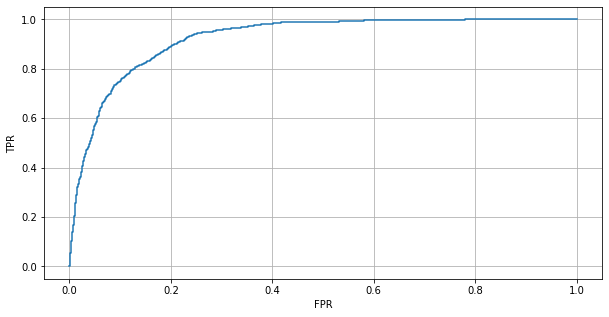

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

0.9229697771713767